# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the mind-val dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to final rankings.

## 1. Setup

### 1. 1 Importing Libraries

PyData packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code:

In [2]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

Set up progress:

In [3]:
from tqdm.autonotebook import tqdm as notebook_tqdm

/tmp/ipykernel_340315/2439040576.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm as notebook_tqdm


### 1. 2 Loading Data

In [4]:
mind_val_user_metrics = pd.read_csv("../outputs/mind-val/profile-metrics.csv.gz")
mind_val_user_metrics.head()

,Unnamed: 0,profile_id,recommender,personalized,NDCG@5,NDCG@10,RR,RBO@5,RBO@10
0,0,00002229-1f34-5beb-ba44-89021dd1f157,nrms,True,0.0,0.30103,0.1,0.409510,0.651322
1,1,00002229-1f34-5beb-ba44-89021dd1f157,mmr,True,0.0,0.00000,0.0,0.216469,0.289265
2,2,00002229-1f34-5beb-ba44-89021dd1f157,pfar,True,0.0,0.30103,0.1,0.409510,0.651322
3,3,00002229-1f34-5beb-ba44-89021dd1f157,topic-cali,True,0.0,0.30103,0.1,0.409510,0.651322
4,4,00002229-1f34-5beb-ba44-89021dd1f157,locality-cali,True,0.0,0.30103,0.1,0.409510,0.651322


In [5]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrics = ["RBO@5", "RBO@10"]

## 2. Results

### 2. 1 Effectiveness Metrics
NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

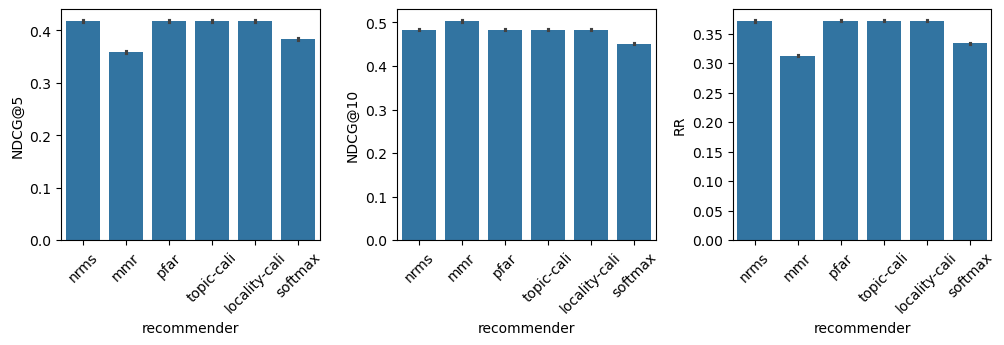

In [6]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_val_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [7]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_val_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]


Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [00:59<04:55, 59.06s/it]


Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [01:57<03:54, 58.63s/it]


Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [03:01<03:02, 60.99s/it]


Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [04:04<02:04, 62.05s/it]


Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [05:08<01:02, 62.57s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:12<00:00, 63.22s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:12<00:00, 62.14s/it]


Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]


Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [01:06<05:31, 66.39s/it]


Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [02:13<04:26, 66.57s/it]


Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [03:14<03:12, 64.33s/it]


Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [04:19<02:08, 64.38s/it]


Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [05:21<01:03, 63.51s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:22<00:00, 62.75s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:22<00:00, 63.74s/it]


quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]


quantiles:  17%|████████████████████████                                                                                                                        | 1/6 [01:50<09:10, 110.15s/it]


quantiles:  33%|████████████████████████████████████████████████                                                                                                | 2/6 [03:35<07:08, 107.23s/it]


quantiles:  50%|████████████████████████████████████████████████████████████████████████                                                                        | 3/6 [05:27<05:27, 109.29s/it]


quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 4/6 [07:18<03:40, 110.27s/it]


quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 5/6 [09:10<01:50, 110.76s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [11:02<00:00, 111.09s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [11:02<00:00, 110.37s/it]

"locality-cali 0.418(0.417,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"mmr 0.359(0.357,0.361)","0.537(0.534,0.539)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms 0.418(0.416,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"pfar 0.418(0.417,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"softmax 0.383(0.382,0.385)","0.406(0.405,0.406)","0.000(0.000,0.000)","0.281(0.281,0.297)","1.000(1.000,1.000)",
"topic-cali 0.418(0.417,0.419)","0.410(0.410,0.411)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",



Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]


Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [01:04<05:21, 64.38s/it]


Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [02:02<04:03, 60.91s/it]


Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [03:01<02:59, 59.74s/it]


Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [04:05<02:02, 61.40s/it]


Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [05:08<01:02, 62.28s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:13<00:00, 62.91s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:13<00:00, 62.19s/it]


Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]


Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [01:01<05:06, 61.22s/it]


Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [02:02<04:03, 60.99s/it]


Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [03:02<03:02, 60.89s/it]


Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [04:09<02:06, 63.26s/it]


Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [05:17<01:04, 64.89s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:24<00:00, 65.52s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:24<00:00, 64.04s/it]


quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]


quantiles:  17%|████████████████████████                                                                                                                        | 1/6 [01:52<09:24, 112.90s/it]


quantiles:  33%|████████████████████████████████████████████████                                                                                                | 2/6 [03:48<07:38, 114.60s/it]


quantiles:  50%|████████████████████████████████████████████████████████████████████████                                                                        | 3/6 [05:42<05:42, 114.06s/it]


quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 4/6 [07:34<03:46, 113.50s/it]


quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 5/6 [09:29<01:53, 113.84s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [11:20<00:00, 113.10s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [11:20<00:00, 113.47s/it]

"locality-cali 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"mmr 0.503(0.500,0.505)","0.784(0.779,0.788)","0.000(0.000,0.000)","0.333(0.333,0.333)","1.000(1.000,1.000)",
"nrms 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"pfar 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",
"softmax 0.451(0.450,0.452)","0.368(0.367,0.368)","0.000(0.000,0.000)","0.387(0.387,0.387)","1.000(1.000,1.000)",
"topic-cali 0.483(0.482,0.484)","0.370(0.370,0.371)","0.000(0.000,0.000)","0.431(0.431,0.431)","1.000(1.000,1.000)",



Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]


Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [01:04<05:22, 64.41s/it]


Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [02:08<04:16, 64.16s/it]


Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [03:12<03:12, 64.29s/it]


Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [04:18<02:09, 64.73s/it]


Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [05:22<01:04, 64.40s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:25<00:00, 64.22s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:25<00:00, 64.32s/it]


Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]


Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [01:07<05:36, 67.37s/it]


Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [02:13<04:26, 66.68s/it]


Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [03:15<03:12, 64.29s/it]


Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [04:16<02:06, 63.20s/it]


Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [05:17<01:02, 62.51s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:21<00:00, 63.06s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:21<00:00, 63.66s/it]


quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]


quantiles:  17%|████████████████████████                                                                                                                        | 1/6 [01:53<09:26, 113.21s/it]


quantiles:  33%|████████████████████████████████████████████████                                                                                                | 2/6 [03:46<07:32, 113.04s/it]


quantiles:  50%|████████████████████████████████████████████████████████████████████████                                                                        | 3/6 [05:40<05:40, 113.57s/it]


quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 4/6 [07:34<03:47, 113.99s/it]


quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 5/6 [09:31<01:54, 114.88s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [11:25<00:00, 114.59s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [11:25<00:00, 114.24s/it]

"locality-cali 0.372(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"mmr 0.313(0.312,0.314)","0.380(0.379,0.381)","0.000(0.000,0.000)","0.143(0.143,0.143)","1.000(1.000,1.000)",
"nrms 0.371(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"pfar 0.372(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",
"softmax 0.333(0.332,0.335)","0.342(0.342,0.343)","0.000(0.000,0.000)","0.200(0.200,0.200)","1.000(1.000,1.000)",
"topic-cali 0.372(0.370,0.373)","0.360(0.359,0.360)","0.000(0.000,0.000)","0.250(0.250,0.250)","1.000(1.000,1.000)",


### 2. 2 Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between pure top-k recommendations and the actual rankings produced after recommendations. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

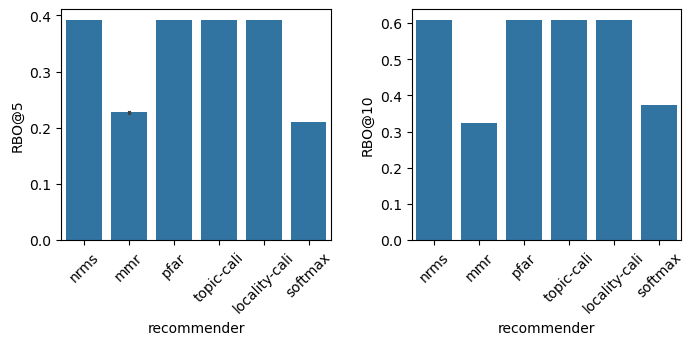

In [8]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrics, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_val_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [9]:
for metric in overlap_metrics:
    tw = EvalTable(mind_val_user_metrics, "recommender", metric, progress=notebook_tqdm)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))


Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]


Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [01:18<06:33, 78.64s/it]


Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [03:06<06:23, 95.81s/it]


Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [04:08<04:01, 80.54s/it]


Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [05:13<02:28, 74.33s/it]


Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [06:19<01:11, 71.33s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [07:25<00:00, 69.43s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [07:25<00:00, 74.23s/it]


Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]


Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [01:07<05:39, 67.80s/it]


Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [02:15<04:31, 67.81s/it]


Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [03:24<03:24, 68.09s/it]


Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [04:31<02:15, 67.72s/it]


Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [05:39<01:08, 68.10s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:43<00:00, 66.71s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:43<00:00, 67.33s/it]


quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]


quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [01:30<07:33, 90.74s/it]


quantiles:  33%|████████████████████████████████████████████████                                                                                                | 2/6 [03:26<07:00, 105.17s/it]


quantiles:  50%|████████████████████████████████████████████████████████████████████████▌                                                                        | 3/6 [04:57<04:57, 99.08s/it]


quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 4/6 [06:29<03:12, 96.26s/it]


quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 5/6 [08:38<01:48, 108.12s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [10:10<00:00, 102.40s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [10:10<00:00, 101.70s/it]

"locality-cali 0.391(0.391,0.392)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"mmr 0.227(0.227,0.227)","0.058(0.058,0.058)","0.203(0.203,0.203)","0.203(0.203,0.203)","0.307(0.307,0.307)",
"nrms 0.391(0.391,0.391)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"pfar 0.391(0.391,0.391)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"softmax 0.210(0.210,0.211)","0.111(0.111,0.112)","0.044(0.044,0.044)","0.216(0.216,0.219)","0.364(0.364,0.364)",
"topic-cali 0.391(0.391,0.391)","0.072(0.072,0.073)","0.396(0.396,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",



Mean:   0%|                                                                                                                                                              | 0/6 [00:00<?, ?it/s]


Mean:  17%|█████████████████████████                                                                                                                             | 1/6 [01:00<05:02, 60.54s/it]


Mean:  33%|██████████████████████████████████████████████████                                                                                                    | 2/6 [02:05<04:12, 63.10s/it]


Mean:  50%|███████████████████████████████████████████████████████████████████████████                                                                           | 3/6 [03:11<03:12, 64.30s/it]


Mean:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 4/6 [04:16<02:09, 64.79s/it]


Mean:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 5/6 [05:22<01:05, 65.07s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:28<00:00, 65.32s/it]


Mean: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:28<00:00, 64.68s/it]


Std Dev:   0%|                                                                                                                                                           | 0/6 [00:00<?, ?it/s]


Std Dev:  17%|████████████████████████▌                                                                                                                          | 1/6 [01:08<05:40, 68.08s/it]


Std Dev:  33%|█████████████████████████████████████████████████                                                                                                  | 2/6 [02:16<04:33, 68.35s/it]


Std Dev:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 3/6 [03:25<03:25, 68.50s/it]


Std Dev:  67%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 4/6 [04:32<02:15, 67.82s/it]


Std Dev:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5/6 [05:39<01:07, 67.61s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:44<00:00, 66.73s/it]


Std Dev: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:44<00:00, 67.39s/it]


quantiles:   0%|                                                                                                                                                         | 0/6 [00:00<?, ?it/s]


quantiles:  17%|████████████████████████▏                                                                                                                        | 1/6 [01:36<08:04, 96.92s/it]


quantiles:  33%|████████████████████████████████████████████████                                                                                                | 2/6 [03:40<07:29, 112.41s/it]


quantiles:  50%|████████████████████████████████████████████████████████████████████████                                                                        | 3/6 [05:17<05:16, 105.39s/it]


quantiles:  67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 4/6 [06:54<03:24, 102.17s/it]


quantiles:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 5/6 [09:02<01:51, 111.45s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [10:39<00:00, 106.56s/it]


quantiles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [10:39<00:00, 106.57s/it]

"locality-cali 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"mmr 0.323(0.323,0.324)","0.103(0.102,0.103)","0.235(0.235,0.235)","0.311(0.308,0.311)","0.453(0.453,0.453)",
"nrms 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"pfar 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"softmax 0.373(0.372,0.373)","0.146(0.146,0.146)","0.172(0.171,0.172)","0.382(0.381,0.383)","0.552(0.552,0.553)",
"topic-cali 0.608(0.607,0.608)","0.126(0.125,0.127)","0.525(0.525,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
